# 基于Riskfolio库的组合投资优化及其应用

Riskfolio-Lib 是一个用于投资组合优化和定量策略资产配置的 Python 库。它的目标是帮助学生、学者和从业人员，轻松建立复杂数学模型的投资组合。它基于 CVXPY ，也大量使用了 pandas 的数据结构。

Riskfolio库 中文文档

https://www.wuzao.com/document/riskfolio-lib/index.html

https://www.yuque.com/wangpeng-lucdx/kb/cyhwomkob37f75q2?singleDoc# 《riskfolio-lib库 中文文档》

A股股票id

https://www.yuque.com/wangpeng-lucdx/kb/kff5ugrp8dise9sm?singleDoc#9b55 《沪深股票代码大全》

### 安装

pip install riskfolio-lib -i https://mirrors.aliyun.com/pypi/simple


In [1]:
import pybroker
from pybroker.ext.data import AKShare
from pybroker import ExecContext, StrategyConfig, Strategy
from pybroker.ext.data import AKShare
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import riskfolio as rp

#正常显示画图时出现的中文和负号
from pylab import mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

akshare = AKShare()

pybroker.enable_data_source_cache('akshare')

## 通过akshare获取行业股票数据并转换为Riskfolio要求的格式

In [2]:
import akshare as ak

# 获取A股行业板块名称数据
stock_board_industry_name_em_df = ak.stock_board_industry_name_em()
# 打印获取到的数据
print(stock_board_industry_name_em_df)

0it [00:00, ?it/s]

    排名   板块名称    板块代码       最新价     涨跌额   涨跌幅            总市值   换手率  上涨家数  \
0    1    半导体  BK1036   1426.18   89.87  6.73  4608526336000  4.38   161   
1    2    贵金属  BK0732   1329.67   53.07  4.16   403375728000  4.85    11   
2    3  非金属材料  BK1020   1226.16   42.86  3.62   374612576000  3.11    27   
3    4  电子化学品  BK1039   1547.07   48.47  3.23   279041664000  5.43    26   
4    5   贸易行业  BK0484   9239.32  250.37  2.79   302452208000  3.27    23   
..  ..    ...     ...       ...     ...   ...            ...   ...   ...   
81  82   多元金融  BK0738    524.32   -4.59 -0.87   421857888000  1.44     4   
82  83   电力行业  BK0428  15521.83 -199.48 -1.27  2990821712000  0.96    12   
83  84   酿酒行业  BK0477  49132.53 -738.91 -1.48  3736780400000  1.31     4   
84  85   食品饮料  BK0438  27146.85 -485.97 -1.76  1628028896000  4.07    18   
85  86   农牧饲渔  BK0433  14158.42 -682.77 -4.60  1025324400000  6.09     9   

    下跌家数   领涨股票  领涨股票-涨跌幅  
0      0    富满微     20.00  
1      0   四川黄金     10.00  
2  

In [4]:
stock_board_industry_name_em_df["板块名称"].values

array(['农牧饲渔', '银行', '酿酒行业', '食品饮料', '旅游酒店', '电力行业', '农药兽药', '铁路公路',
       '航空机场', '贵金属', '小金属', '商业百货', '物流行业', '煤炭行业', '中药', '航运港口', '公用事业',
       '燃气', '水泥建材', '珠宝首饰', '保险', '化肥行业', '电子化学品', '航天航空', '化纤行业',
       '钢铁行业', '美容护理', '石油行业', '装修建材', '工程建设', '生物制品', '房地产开发', '医药商业',
       '证券', '造纸印刷', '综合行业', '汽车整车', '化学制品', '玻璃玻纤', '化学原料', '非金属材料',
       '装修装饰', '多元金融', '专业服务', '化学制药', '有色金属', '医疗器械', '纺织服装', '工程机械',
       '房地产服务', '贸易行业', '包装材料', '文化传媒', '半导体', '汽车服务', '能源金属', '教育',
       '家电行业', '环保行业', '采掘行业', '橡胶制品', '交运设备', '电源设备', '电网设备', '通信服务',
       '船舶制造', '风电设备', '家用轻工', '计算机设备', '工程咨询服务', '游戏', '医疗服务', '塑料制品',
       '仪器仪表', '通信设备', '专用设备', '软件开发', '通用设备', '汽车零部件', '光伏设备', '电子元件',
       '电机', '光学光电子', '互联网服务', '电池', '消费电子'], dtype=object)

In [3]:
stock_board_industry_cons_em_df = ak.stock_board_industry_cons_em(symbol="汽车整车")
print(stock_board_industry_cons_em_df)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

    序号      代码     名称     最新价   涨跌幅    涨跌额      成交量           成交额    振幅  \
0    1  002594    比亚迪  354.98  5.52  18.58   189945  6.621822e+09  6.29   
1    2  600303   ST曙光    3.34  5.03   0.16     5667  1.892778e+06  0.00   
2    3  601777   千里科技    8.13  3.83   0.30   650477  5.254811e+08  7.41   
3    4  200625  长  安Ｂ    3.63  3.42   0.12    75754  2.728822e+07  1.71   
4    5  600375  *ST汉马    5.96  2.94   0.17    98254  5.789133e+07  4.66   
5    6  600066   宇通客车   25.85  2.50   0.63   173543  4.451190e+08  3.57   
6    7  600733   北汽蓝谷    7.75  2.11   0.16  1431382  1.113435e+09  4.74   
7    8  600418   江淮汽车   32.47  2.04   0.65   501986  1.633677e+09  4.12   
8    9  000957   中通客车   10.02  1.73   0.17   147347  1.468453e+08  4.16   
9   10  000868   安凯客车    5.54  1.28   0.07   219487  1.217546e+08  4.94   
10  11  601238   广汽集团    7.97  1.14   0.09   219727  1.741953e+08  2.54   
11  12  600841   动力新科    4.98  1.01   0.05   127482  6.371779e+07  4.06   
12  13  000625   长安汽车   1

In [7]:
stock_board_industry_cons_em_df.columns

Index(['序号', '代码', '名称', '最新价', '涨跌幅', '涨跌额', '成交量', '成交额', '振幅', '最高', '最低',
       '今开', '昨收', '换手率', '市盈率-动态', '市净率'],
      dtype='object')

In [4]:
stock_qiche=stock_board_industry_cons_em_df.sort_values(by="市盈率-动态", ascending=False).iloc[0:12, :]
stock_qiche

,序号,代码,名称,最新价,涨跌幅,涨跌额,成交量,成交额,振幅,最高,最低,今开,昨收,换手率,市盈率-动态,市净率
2,3,601777,千里科技,8.13,3.83,0.30,650477,5.254811e+08,7.41,8.23,7.65,7.69,7.83,1.44,690.09,3.52
9,10,000868,安凯客车,5.54,1.28,0.07,219487,1.217546e+08,4.94,5.62,5.35,5.35,5.47,2.99,620.22,6.06
10,11,601238,广汽集团,7.97,1.14,0.09,219727,1.741953e+08,2.54,8.01,7.81,7.88,7.88,0.30,98.68,0.71
23,24,600686,金龙汽车,11.76,-0.84,-0.10,201550,2.382804e+08,2.61,11.99,11.68,11.68,11.86,2.81,82.79,2.66
21,22,000572,海马汽车,3.57,-0.28,-0.01,244496,8.772923e+07,3.07,3.62,3.51,3.52,3.58,1.49,78.49,3.01
4,5,600375,*ST汉马,5.96,2.94,0.17,98254,5.789133e+07,4.66,6.02,5.75,5.78,5.79,0.90,60.77,2.90
15,16,000800,一汽解放,7.60,0.66,0.05,94852,7.181000e+07,1.72,7.62,7.49,7.51,7.55,0.21,60.10,1.42
16,17,601127,赛力斯,127.23,0.58,0.73,169714,2.155679e+09,1.38,127.75,126.01,126.50,126.50,1.12,34.95,10.17
22,23,600166,福田汽车,2.38,-0.42,-0.01,890859,2.134873e+08,2.09,2.42,2.37,2.38,2.39,1.37,32.70,1.29
0,1,002594,比亚迪,354.98,5.52,18.58,189945,6.621822e+09,6.29,357.55,336.40,337.00,336.40,1.63,26.80,6.33


In [5]:
stock_qiche["代码"].values

array(['601777', '000868', '601238', '600686', '000572', '600375',
       '000800', '601127', '600166', '002594', '000957', '600104'],
      dtype=object)

In [6]:
df = akshare.query(
    symbols=stock_qiche["代码"].values,
    start_date='3/2/2021',
    end_date='3/1/2023',
    adjust="hfq",
    timeframe="1d",
)
df

Loaded cached bar data.



,date,symbol,open,high,low,close,volume
4841,2021-03-02,600166,115.80,116.37,108.01,108.88,2261207
4842,2021-03-03,600166,110.61,115.51,109.17,112.34,2121255
4843,2021-03-04,600166,111.76,119.54,110.90,112.05,2254593
4844,2021-03-05,600166,110.61,115.51,105.13,112.34,1433788
4845,2021-03-08,600166,114.64,121.85,109.45,112.05,3634714
...,...,...,...,...,...,...,...
5808,2023-02-23,000800,20.05,20.27,19.85,19.92,92336
5809,2023-02-24,000800,19.94,19.96,19.65,19.78,83613
5810,2023-02-27,000800,19.71,19.81,19.61,19.67,62421
5811,2023-02-28,000800,19.69,19.76,19.51,19.65,70316


In [11]:
stock_qiche[["代码","名称"]]

,代码,名称
11,601777,千里科技
15,000868,安凯客车
10,601238,广汽集团
17,600686,金龙汽车
24,000572,海马汽车
2,600375,*ST汉马
8,000800,一汽解放
7,600166,福田汽车
6,601127,赛力斯
9,000625,长安汽车


In [7]:
#连接stock_qiche[["代码","名称"]]和df，基于代码列与df的symbol列
df_qiche = df.merge(stock_qiche[["代码","名称"]],left_on="symbol",right_on="代码",how="left")

In [13]:
df_qiche

,date,symbol,open,high,low,close,volume,代码,名称
0,2021-03-02,600375,21.06,21.06,20.65,20.72,41467,600375,*ST汉马
1,2021-03-03,600375,20.86,20.99,20.50,20.88,52979,600375,*ST汉马
2,2021-03-04,600375,20.81,20.97,20.68,20.92,55334,600375,*ST汉马
3,2021-03-05,600375,20.95,21.46,20.79,21.31,74847,600375,*ST汉马
4,2021-03-08,600375,21.28,21.49,21.13,21.19,52948,600375,*ST汉马
...,...,...,...,...,...,...,...,...,...
5808,2023-02-23,002594,271.15,272.92,269.75,271.69,100358,002594,比亚迪
5809,2023-02-24,002594,270.27,271.13,268.25,268.83,66868,002594,比亚迪
5810,2023-02-27,002594,266.25,267.14,259.25,261.06,169704,002594,比亚迪
5811,2023-02-28,002594,262.25,263.25,258.82,262.05,120330,002594,比亚迪


In [10]:
stock_close.div(stock_close.iloc[0,:],axis=1)

名称,*ST汉马,一汽解放,上汽集团,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车
date,,,,,,,,,,,,
2021-03-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-03-03,1.007722,1.009520,1.008749,1.010902,0.977931,1.014438,1.018034,0.992232,1.003597,1.031778,1.096606,1.012742
2021-03-04,1.009653,0.996971,0.994633,1.000000,0.977931,1.048336,1.001745,0.939266,1.009892,1.029115,1.202611,1.010221
2021-03-05,1.028475,1.007789,0.998383,1.031203,0.986207,1.099812,1.015125,0.929237,1.012590,1.031778,1.248564,1.074069
2021-03-08,1.022683,1.001731,0.986179,1.005639,0.960000,1.042687,0.999418,0.836770,1.028777,1.029115,1.160836,1.045926
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,1.174710,0.861965,0.860682,1.806767,0.775172,1.812932,1.129145,1.279143,1.848921,1.039677,1.987467,1.017222
2023-02-24,1.158784,0.855907,0.855095,1.768797,0.768276,1.772756,1.118092,1.265678,1.870504,1.034442,1.968146,1.007001
2023-02-27,1.159749,0.851147,0.852889,1.748496,0.760000,1.761456,1.109366,1.229096,1.823741,1.015889,1.983290,0.999300


In [9]:
stock_close=df_qiche.pivot(index="date",columns="名称",values="close").bfill().ffill()
Y_all=stock_close.pct_change().dropna()

In [23]:
Y_all

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-03,0.007722,0.009520,0.010902,-0.022069,0.014438,0.018034,-0.007768,0.003597,0.031778,0.096606,0.012742,0.005566
2021-03-04,0.001916,-0.012430,-0.010785,0.000000,0.033416,-0.016000,-0.053381,0.006272,-0.002581,0.096667,-0.002489,-0.027099
2021-03-05,0.018642,0.010851,0.031203,0.008463,0.049102,0.013357,-0.010677,0.002671,0.002588,0.038211,0.063202,0.008297
2021-03-08,-0.005631,-0.006011,-0.024790,-0.026573,-0.051941,-0.015473,-0.099509,0.015986,-0.002581,-0.070263,-0.026203,-0.023628
2021-03-09,-0.015573,-0.027646,-0.019065,-0.030172,-0.040939,0.040745,-0.034040,-0.048951,-0.064346,-0.097166,-0.036680,-0.062365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,-0.020917,-0.004000,0.001459,0.003571,-0.003107,-0.002569,0.000074,-0.018147,-0.012561,-0.007821,-0.001237,0.006453
2023-02-24,-0.013558,-0.007028,-0.021015,-0.008897,-0.022161,-0.009789,-0.010527,0.011673,-0.005035,-0.009721,-0.010048,-0.020532
2023-02-27,0.000833,-0.005561,-0.011477,-0.010772,-0.006374,-0.007804,-0.028903,-0.025000,-0.017935,0.007694,-0.007647,-0.011849


In [11]:
#让stock_close的每一列除以第一行
stock_close_div0=stock_close.div(stock_close.iloc[0,:],axis=1)

In [13]:
stock_close_div0

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-03-03,1.007722,1.009520,1.010902,0.977931,1.014438,1.018034,0.992232,1.003597,1.031778,1.096606,1.012742,1.005566
2021-03-04,1.009653,0.996971,1.000000,0.977931,1.048336,1.001745,0.939266,1.009892,1.029115,1.202611,1.010221,0.978316
2021-03-05,1.028475,1.007789,1.031203,0.986207,1.099812,1.015125,0.929237,1.012590,1.031778,1.248564,1.074069,0.986433
2021-03-08,1.022683,1.001731,1.005639,0.960000,1.042687,0.999418,0.836770,1.028777,1.029115,1.160836,1.045926,0.963126
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,1.174710,0.861965,1.806767,0.775172,1.812932,1.129145,1.279143,1.848921,1.039677,1.987467,1.017222,1.428803
2023-02-24,1.158784,0.855907,1.768797,0.768276,1.772756,1.118092,1.265678,1.870504,1.034442,1.968146,1.007001,1.399467
2023-02-27,1.159749,0.851147,1.748496,0.760000,1.761456,1.109366,1.229096,1.823741,1.015889,1.983290,0.999300,1.382885


<Axes: xlabel='date'>

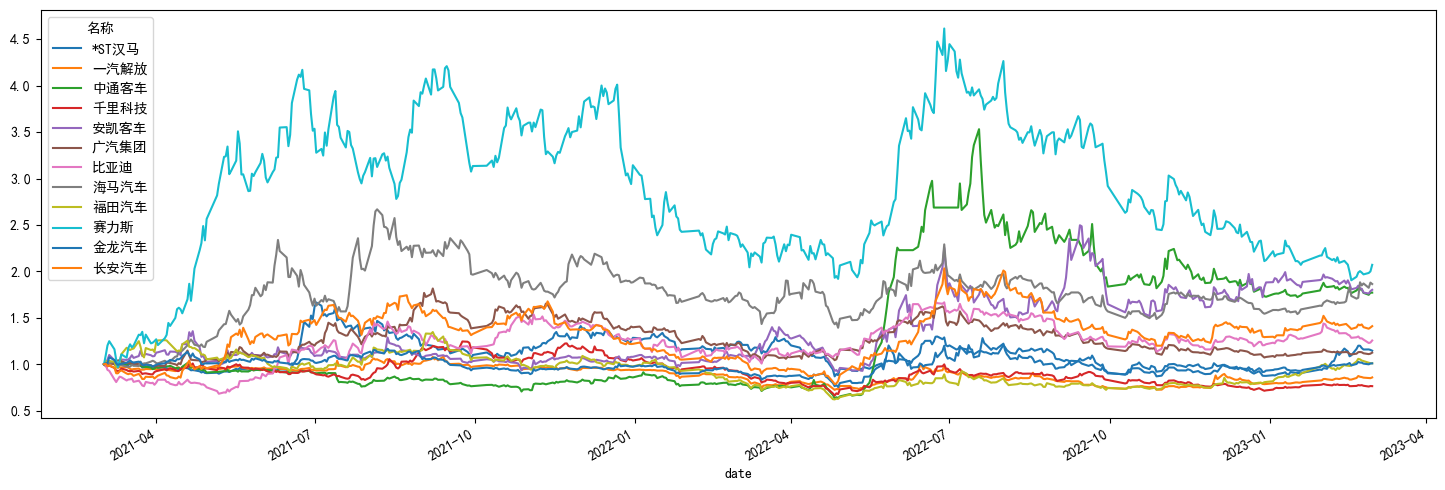

In [14]:
fig=plt.figure(figsize=(18,6))
stock_close_div0.plot(ax=fig.gca())

In [15]:
Y_all

名称,*ST汉马,一汽解放,中通客车,千里科技,安凯客车,广汽集团,比亚迪,海马汽车,福田汽车,赛力斯,金龙汽车,长安汽车
date,,,,,,,,,,,,
2021-03-03,0.007722,0.009520,0.010902,-0.022069,0.014438,0.018034,-0.007768,0.003597,0.031778,0.096606,0.012742,0.005566
2021-03-04,0.001916,-0.012430,-0.010785,0.000000,0.033416,-0.016000,-0.053381,0.006272,-0.002581,0.096667,-0.002489,-0.027099
2021-03-05,0.018642,0.010851,0.031203,0.008463,0.049102,0.013357,-0.010677,0.002671,0.002588,0.038211,0.063202,0.008297
2021-03-08,-0.005631,-0.006011,-0.024790,-0.026573,-0.051941,-0.015473,-0.099509,0.015986,-0.002581,-0.070263,-0.026203,-0.023628
2021-03-09,-0.015573,-0.027646,-0.019065,-0.030172,-0.040939,0.040745,-0.034040,-0.048951,-0.064346,-0.097166,-0.036680,-0.062365
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,-0.020917,-0.004000,0.001459,0.003571,-0.003107,-0.002569,0.000074,-0.018147,-0.012561,-0.007821,-0.001237,0.006453
2023-02-24,-0.013558,-0.007028,-0.021015,-0.008897,-0.022161,-0.009789,-0.010527,0.011673,-0.005035,-0.009721,-0.010048,-0.020532
2023-02-27,0.000833,-0.005561,-0.011477,-0.010772,-0.006374,-0.007804,-0.028903,-0.025000,-0.017935,0.007694,-0.007647,-0.011849


## 基于Riskfolio库组合投资优化

* 计算半标准差风险平价投资组合和最大化风险调整收益比的投资组合

估计半标准差的风险平价投资组合和估计最大化风险调整收益比的投资组合在风险衡量、资产配置目标、对收益与波动的侧重、组合构建方法以及适用场景上存在明显区别：
1. **风险衡量方式**
    - **半标准差风险平价投资组合**：主要基于半标准差来衡量风险。半标准差仅考虑收益率低于均值的波动情况 ，聚焦下行风险。比如，在股市下跌期间，它能精准衡量投资组合价值下降的波动程度，忽略收益高于均值部分的波动，对投资者面临的实际损失风险评估更具针对性。
    - **最大化风险调整收益比投资组合**：常用夏普比率等指标衡量风险与收益的综合关系。夏普比率计算的是投资组合在承担单位风险时所能获得的超过无风险收益的额外收益，考虑的是整体收益波动，既包含向上波动也包含向下波动。
2. **资产配置目标**
    - **半标准差风险平价投资组合**：目标是使各资产对投资组合的风险贡献大致相等。通过平衡不同资产的风险敞口，让投资组合在各种市场环境下风险分布更为均匀，避免因某类资产波动过大主导整体风险。假设投资组合包含股票、债券和黄金，会调整各类资产比例，让它们对组合风险的贡献相近。
    - **最大化风险调整收益比投资组合**：旨在找到风险与收益的最佳平衡点，实现风险调整后收益的最大化。在构建组合时，会综合权衡资产的预期收益和风险水平，挑选能使夏普比率等指标达到最优的资产配置方案，追求在同等风险下获取更高收益。
3. **对收益与波动的侧重**
    - **半标准差风险平价投资组合**：更注重控制风险，尤其是下行风险。在资产选择和配置过程中，会优先保障组合的稳定性，在降低风险的基础上追求收益。在市场不稳定或投资者风险承受能力较低时，这种组合能有效减少潜在损失，保障资产安全。
    - **最大化风险调整收益比投资组合**：对收益和风险的权衡更为综合。它不单纯追求低风险或高收益，而是通过优化资产配置，使投资组合在承担一定风险的情况下，获得尽可能高的收益，更符合追求资产增值且能承受一定风险的投资者需求。
4. **组合构建方法**
    - **半标准差风险平价投资组合**：构建过程通常借助复杂的数学模型和算法，精确计算各资产的风险贡献，根据风险平价原则调整资产权重。实践中，可能需要运用优化软件求解多变量约束条件下的最优解，确定各类资产在组合中的占比。
    - **最大化风险调整收益比投资组合**：构建时需预测资产的预期收益、风险以及相关性，通过不断优化资产配置比例，使风险调整收益比达到最大。这可能涉及到历史数据统计分析、宏观经济预测以及资产定价模型的运用，以获取合理的输入参数，找到最优组合。
5. **适用场景**
    - **半标准差风险平价投资组合**：适合风险偏好较低、追求资产稳健增值的投资者，或在市场不确定性高、下行风险较大的环境中。比如在经济衰退预期较强时，这种组合能有效抵御市场波动，保护资产价值。
    - **最大化风险调整收益比投资组合**：更适合风险承受能力适中、追求长期资产增值且愿意承担一定风险的投资者。在市场相对稳定、经济处于增长阶段时，这类组合能更好地发挥优势，实现资产的高效增长。 

In [24]:
Y = Y_all

# 创建投资组合对象
port = rp.Portfolio(returns=Y)

# 以百分比格式显示数据框的值
#pd.options.display.float_format = '{:.4%}'.format

# 选择风险度量
rm = 'MSV'  # 半标准差

# 估计模型的输入（历史估计）
method_mu = 'hist'  # 基于历史数据估计预期收益的方法
method_cov = 'hist'  # 基于历史数据估计协方差矩阵的方法
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# 估计最大化风险调整收益比的投资组合
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# 估计有效前沿（均值 - 半标准差）上的点
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# 估计半标准差的风险平价投资组合
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

In [27]:
#ws

In [29]:
w2


,weights
*ST汉马,0.089409
一汽解放,0.128751
中通客车,0.083295
千里科技,0.110176
安凯客车,0.056330
广汽集团,0.087749
比亚迪,0.080177
海马汽车,0.069122
福田汽车,0.088221
赛力斯,0.053120


In [20]:
w1

,weights
*ST汉马,4.328836e-12
一汽解放,1.067719e-10
中通客车,3.000197e-01
千里科技,1.327351e-10
安凯客车,1.629218e-01
广汽集团,4.112205e-11
比亚迪,1.159668e-10
海马汽车,2.982215e-01
福田汽车,7.822153e-11
赛力斯,2.388369e-01


In [22]:
w2

,weights
*ST汉马,0.089409
一汽解放,0.128751
中通客车,0.083295
千里科技,0.110176
安凯客车,0.056330
广汽集团,0.087749
比亚迪,0.080177
海马汽车,0.069122
福田汽车,0.088221
赛力斯,0.053120


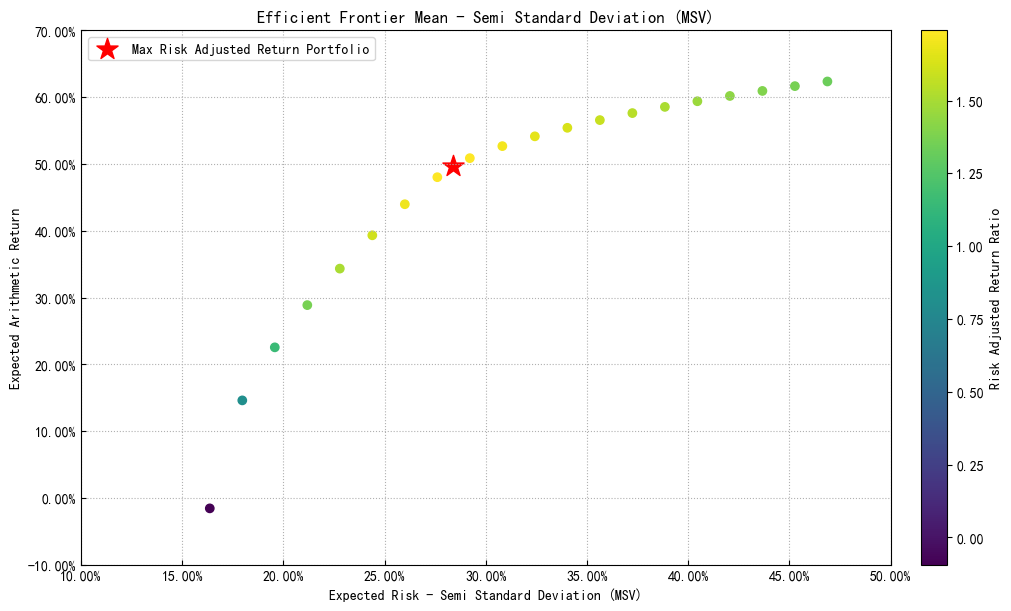

In [28]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

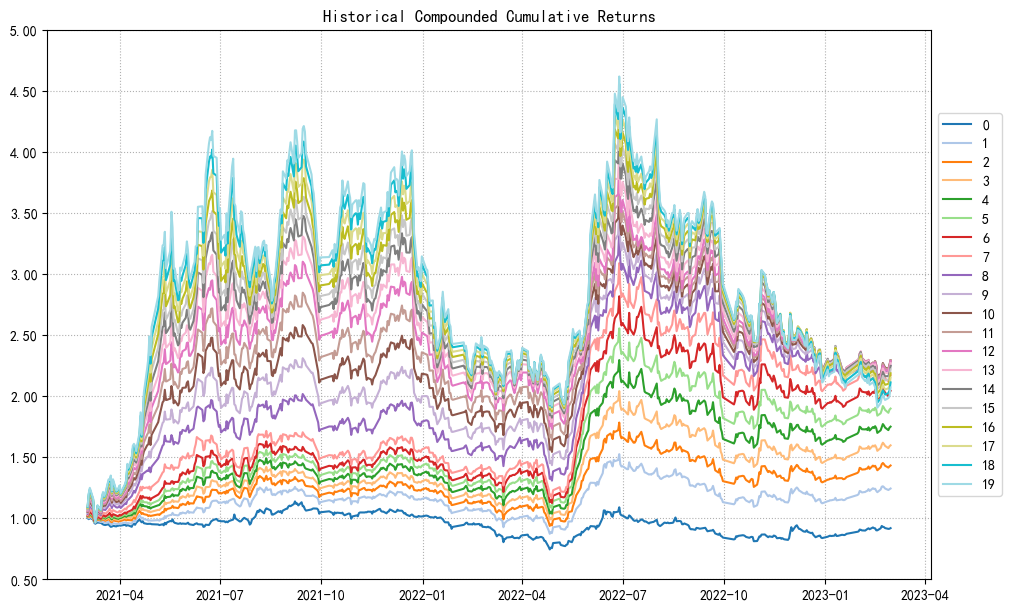

In [30]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

### classwork1

上面课件的运行

* 获取对应行业的股票
* 把股票转为riskfolio要求的格式
* 放入riskfolio进行组合优化并画图

## pybroker框架下的组合投资实现

### 最简单的组合投资策略实现——等额仓位配置

* pybroker下重新平衡仓位

* 两种方法的区别：

strategy.add_execution(None, stock_qiche["代码"].values)

strategy.set_after_exec(rebalance)

* ctxs: dict[str, ExecContext] 的必要性

#### 第一个策略

In [12]:
# 定义交易策略函数
def buy_func(ctx: ExecContext) -> None:
    pos = ctx.long_pos()  # 获取当前的长期持有的股票
    print(ctx.dt)
    #print(ctx.date[-1])
    #print(ctx.volume)
    #print(ctx.symbol)
    if pos:  # 如果当前持有股票
        #ctx.sell_shares = pos.shares  # 卖出所有的股票
        pass
    else:  # 如果当前没有持有股票
        ctx.buy_shares = ctx.calc_target_shares(0.5)  # 买入全部可购买的股票
        ctx.hold_bars = 3  # 设置持有的交易日为3天

# 创建策略配置对象，设置初始现金为 500,000 元
my_config = StrategyConfig(initial_cash=500000)
# 创建策略对象，设置数据源为 AKShare，开始日期为 '20230801'，结束日期为 '20230830'，策略配置为 my_config
strategy = Strategy(data_source=akshare, start_date='20230801', end_date='20230830', config=my_config)
# 将定义的交易策略函数添加到策略对象中，应用于股票 '000001'
strategy.add_execution(fn=buy_func, symbols=['000001',"600000"])
# 执行回测
result = strategy.backtest()

Backtesting: 2023-08-01 00:00:00 to 2023-08-30 00:00:00

Loaded cached bar data.

Test split: 2023-08-01 00:00:00 to 2023-08-30 00:00:00


  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2023-08-01 00:00:00
2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-04 00:00:00
2023-08-07 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-11 00:00:00
2023-08-14 00:00:00
2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-18 00:00:00
2023-08-21 00:00:00
2023-08-21 00:00:00
2023-08-22 00:00:00
2023-08-22 00:00:00
2023-08-23 00:00:00
2023-08-23 00:00:00
2023-08-24 00:00:00
2023-08-24 00:00:00
2023-08-25 00:00:00
2023-08-25 00:00:00
2023-08-28 00:00:00
2023-08-28 00:00:00
2023-08-29 00:00:00
2023-08-29 00:00:00
2023-08-30 00:00:00
2023-08-30 00:00:00

Finished backtest: 0:00:04


#### set_after_exec的功能

在 pybroker 里，strategy.set_after_exec 是 Strategy 类的一个方法，其功能是设定一个回调函数，该回调函数会在每个交易日所有执行函数执行完毕之后被调用。

In [86]:
pybroker.param('aa',0)

0

In [87]:
pybroker.param('aa',0)

0

In [16]:
#假设我们希望每月初对一个只做多头的投资组合进行重新平衡，以确保投资组合中的每只股票都有大致相等的配置。
#首先，我们编写一个辅助函数，用于检测当前 K 线的日期是否为新月的开始：
# ctxs: dict[str, ExecContext] 是一个字典，键是字符串，值是ExecContext对象
def start_of_month(ctxs: dict[str, ExecContext]) -> bool:
    dt = tuple(ctxs.values())[0].dt
    if dt.month != pybroker.param('current_month'):
        pybroker.param('current_month', dt.month)
        return True
    return False

#接下来，我们实现一个函数，该函数将买入或卖出足够数量的股票，以达到目标配置。
#如果当前配置高于目标水平，该函数将卖出所需数量的资产股票；如果当前配置低于目标水平，该函数将买入所需数量的资产股票。
def set_target_shares(
    ctxs: dict[str, ExecContext],
    targets: dict[str, float]
):
    for symbol, target in targets.items():
        ctx = ctxs[symbol]
        target_shares = ctx.calc_target_shares(target)
        pos = ctx.long_pos()
        if pos is None:
            ctx.buy_shares = target_shares
        elif pos.shares < target_shares:
            ctx.buy_shares = target_shares - pos.shares
        elif pos.shares > target_shares:
            ctx.sell_shares = pos.shares - target_shares

#随后，我们编写一个rebalance函数，以便在每月初将每种资产的配置调整为相等：
def rebalance(ctxs: dict[str, ExecContext]):
    if start_of_month(ctxs):
        target = 1 / len(ctxs)
        set_target_shares(ctxs, {symbol: target for symbol in ctxs.keys()})

现在我们已经实现了rebalance函数，下一步是使用五只股票的投资组合对我们的重新平衡策略进行回测。为了在每根数据 K 线上同时处理所有股票，我们将使用Strategy#set_after_exec方法：

In [14]:
strategy = Strategy(akshare, start_date='3/2/2021', end_date='3/1/2023')
strategy.add_execution(None, stock_qiche["代码"].values)
strategy.set_after_exec(rebalance)
result = strategy.backtest()

Backtesting: 2021-03-02 00:00:00 to 2023-03-01 00:00:00

Loaded cached bar data.

Test split: 2021-03-02 00:00:00 to 2023-03-01 00:00:00


  0% (0 of 486) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  2% (11 of 486) |                       | Elapsed Time: 0:00:00 ETA:   0:00:02
  6% (31 of 486) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (51 of 486) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:01
 14% (71 of 486) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (91 of 486) |####                   | Elapsed Time: 0:00:00 ETA:   0:00:01
 22% (111 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 26% (131 of 486) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:01
 31% (151 of 486) |######                | Elapsed Time: 0:00:00 ETA:   0:00:01
 35% (171 of 486) |#######               | Elapsed Time: 0:00:00 ETA:   0:00:01
 39% (191 of 486) |########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 43% (211 of 486) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 47% (231 of 486) |##########           


Finished backtest: 0:00:02


In [10]:
#result.metrics_df

### Riskfolio组合优化策略实现

In [17]:
Y = Y_all
port = rp.Portfolio(returns=Y)
port.assets_stats(method_mu='hist', method_cov='hist')
w1 = port.optimization(model='Classic', rm='MSV', obj='Sharpe', rf=0.0, l=0, hist=True)


In [18]:
w1

,weights
*ST汉马,1.409478e-11
一汽解放,1.484342e-10
上汽集团,1.065029e-10
中通客车,3.000196e-01
千里科技,1.896258e-10
安凯客车,1.629219e-01
广汽集团,4.427955e-11
比亚迪,2.049416e-10
海马汽车,2.982213e-01
福田汽车,1.031380e-10


In [36]:
pybroker.param('lookback', 100)  # Use past year of returns.

def calculate_returns(ctxs: dict[str, ExecContext], lookback: int):
    prices = {}
    for ctx in ctxs.values():
        prices[ctx.symbol] = ctx.close[-lookback:]
    df = pd.DataFrame(prices)
    return df.pct_change().dropna()

def optimization(ctxs: dict[str, ExecContext]):
    lookback = pybroker.param('lookback')
    if start_of_month(ctxs):
        Y = calculate_returns(ctxs, lookback)
        port = rp.Portfolio(returns=Y)
        port.assets_stats(method_mu='hist', method_cov='hist')
        w = port.optimization(
            model='Classic',
            rm='CVaR',
            obj='MinRisk',
            rf=0,      # Risk free rate.
            l=0,       # Risk aversion factor.
            hist=True  # Use historical scenarios.
        )
        #print(w.T["000800"].values[0])
        targets = {
            symbol: w.T[symbol].values[0]
            for symbol in ctxs.keys()
        }
        set_target_shares(ctxs, targets)

In [35]:
strategy = Strategy(akshare, start_date='3/2/2021', end_date='3/1/2022')
strategy.add_execution(None, stock_qiche["代码"].values)
strategy.set_after_exec(optimization)
result = strategy.backtest(warmup=pybroker.param('lookback'))

Backtesting: 2021-03-02 00:00:00 to 2022-03-01 00:00:00

Loaded cached bar data.

Test split: 2021-03-02 00:00:00 to 2022-03-01 00:00:00


  0% (0 of 243) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 41% (101 of 243) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (111 of 243) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:00


0.17831661684593153
0.16205649621529364


 53% (131 of 243) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00


0.1632199541002038


 62% (151 of 243) |#############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 70% (171 of 243) |###############       | Elapsed Time: 0:00:00 ETA:   0:00:00


0.160560222371226
0.059687099420510446


 78% (191 of 243) |#################     | Elapsed Time: 0:00:00 ETA:   0:00:00


0.05813977564482597


 86% (211 of 243) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 95% (231 of 243) |####################  | Elapsed Time: 0:00:00 ETA:   0:00:00


2.8522903072722744e-10
3.7990686070097674e-11


100% (243 of 243) |######################| Elapsed Time: 0:00:00 ETA:  00:00:00
100% (243 of 243) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


1.958176212950804e-11

Finished backtest: 0:00:01


In [28]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,


In [94]:
result.metrics_df

,name,value
0,trade_count,8300.0000%
1,initial_market_value,10000000.0000%
2,end_market_value,10595275.0000%
3,total_pnl,-508965.0000%
4,unrealized_pnl,1104240.0000%
5,total_return_pct,-508.9650%
6,total_profit,3606264.0000%
7,total_loss,-4115229.0000%
8,total_fees,0.0000%
9,max_drawdown,-3853749.0000%


### classwork2

* 船舶制造行业市盈率前10的股票的组合投资优化策略实现，时间2022年1月1日-2024年1月1日

## riskfolio中的作图函数及其意义

In [43]:
Y = Y_all
port = rp.Portfolio(returns=Y)
rm = 'MSV'  # 半标准差
method_mu = 'hist'  # 基于历史数据估计预期收益的方法
method_cov = 'hist'  # 基于历史数据估计协方差矩阵的方法
port.assets_stats(method_mu=method_mu, method_cov=method_cov)
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

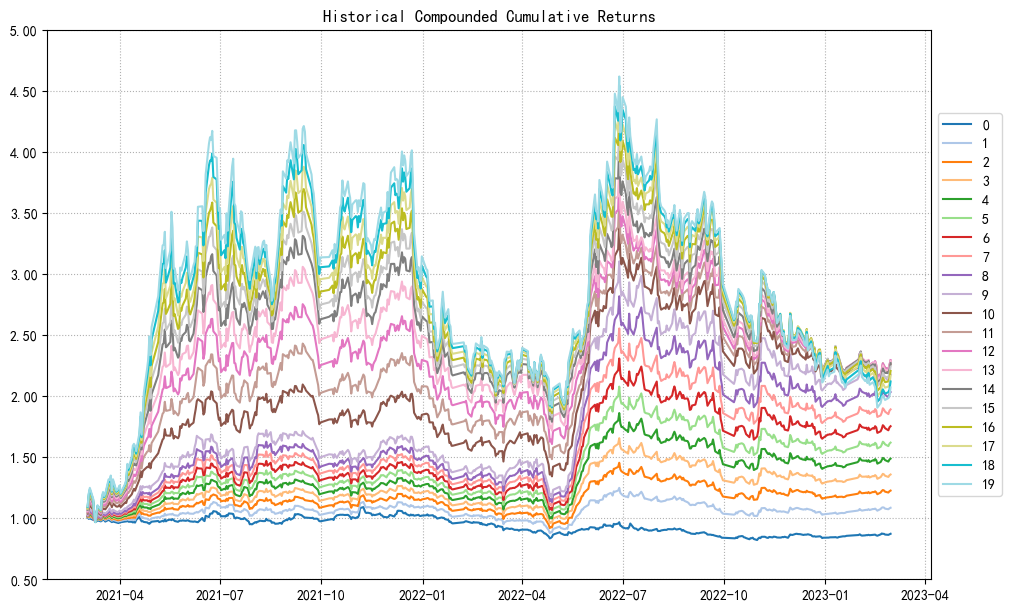

In [44]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

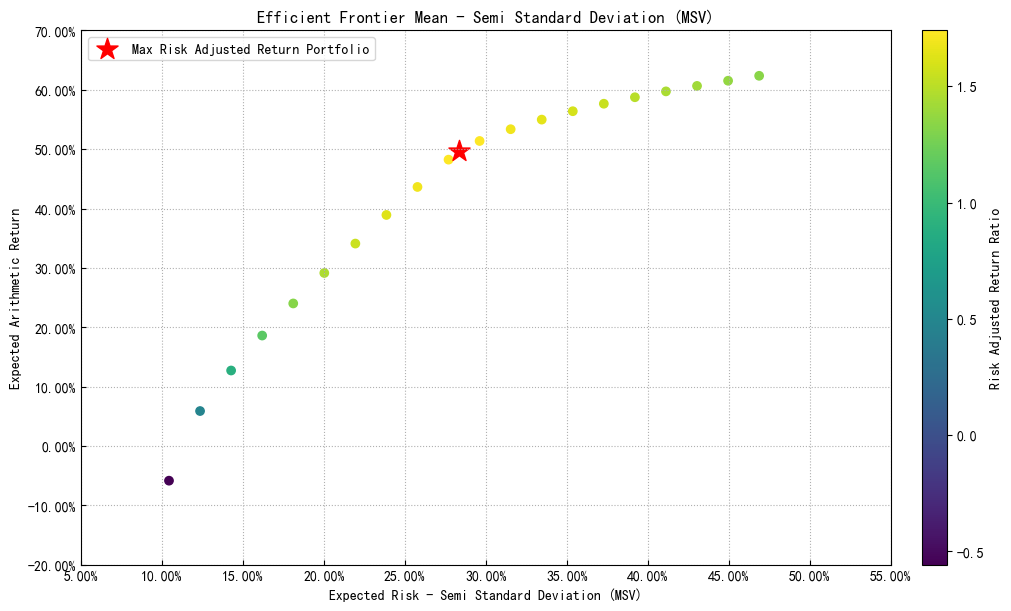

In [45]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w1,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

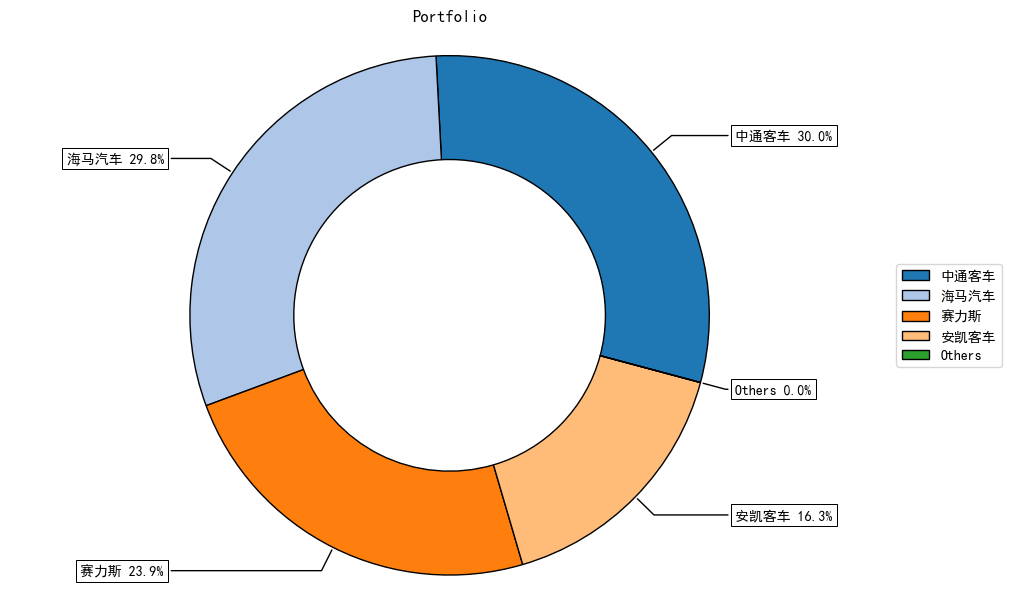

In [46]:
ax = rp.plot_pie(w=w1,
                 title='Portfolio',
                 height=6,
                 width=10,
                 cmap="tab20",
                 ax=None)

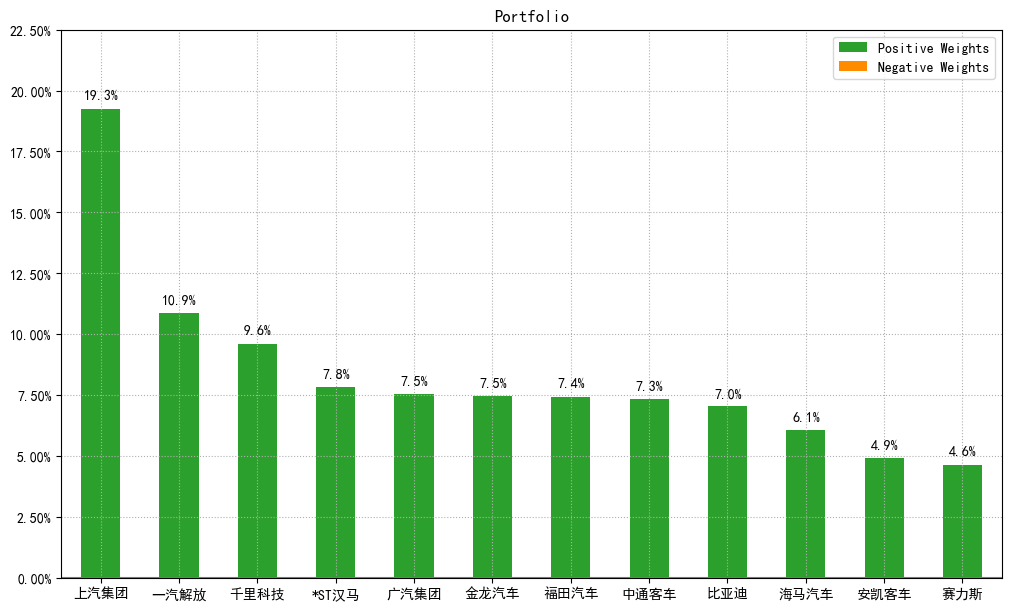

In [49]:
ax = rp.plot_bar(w=w2,
                 title='Portfolio',
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

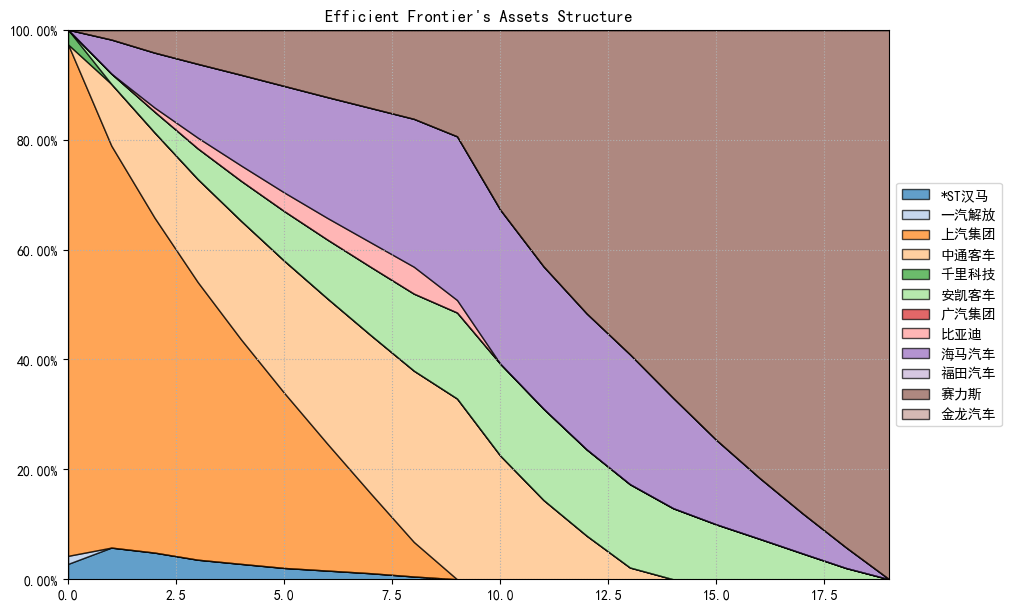

In [50]:
ax = rp.plot_frontier_area(w_frontier=ws,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

### rp.plot_risk_con

`rp.plot_risk_con` 是 `riskfolio` 库中的一个绘图函数，其主要功能是创建一个展示投资组合中各资产风险贡献的图表。以下为你详细介绍它的用途和意义：

* 用途

- **评估资产对投资组合风险的影响**：在投资组合中，不同资产对整体风险的贡献可能有很大差异。通过该函数绘制的图表，投资者能够清晰地看到每个资产对投资组合风险的具体贡献程度，从而判断哪些资产是风险的主要来源。
- **优化投资组合**：根据各资产的风险贡献情况，投资者可以调整投资组合中资产的权重。对于风险贡献过高的资产，可以考虑减少其权重；而对于风险贡献较低且预期收益合理的资产，可以适当增加权重，以此来优化投资组合的风险 - 收益特征。
- **风险控制与管理**：帮助投资者更好地进行风险控制和管理。了解各资产的风险贡献后，投资者可以设定合理的风险预算，确保投资组合的风险在可承受范围内。

* 绘图参数及展示内容

该函数有一系列参数用于控制绘图，比如投资组合权重 `w`、协方差矩阵 `cov`、收益率数据 `returns`、风险度量方法 `rm` 等。以下是一些关键参数及对应展示内容的说明：
- **风险度量方法 `rm`**：该参数决定了使用何种方式来衡量风险，常见的有标准差（`'MV'`）、半标准差（`'MSV'`）、条件风险价值（`'CVaR'`）等。不同的风险度量方法会导致各资产风险贡献的计算结果不同，从而在图表中呈现出不同的风险分布情况。
- **各资产的风险贡献**：图表会直观地展示每个资产对投资组合总风险的贡献比例或具体数值。通过柱子的高度或颜色深浅等视觉元素，投资者可以快速比较各资产之间的风险贡献差异。
- **等风险贡献线（可选）**：如果设置 `erc_line=True`，图表中会绘制等风险贡献线。这条线可以帮助投资者判断当前投资组合是否接近等风险贡献的理想状态，即每个资产对投资组合风险的贡献相等。

* 示例及实际意义

假设你构建了一个包含多只股票的投资组合，使用 `rp.plot_risk_con` 函数绘制风险贡献图后，发现某只股票的风险贡献极高，而其预期收益并没有明显优势。那么，你可以考虑减少该股票在投资组合中的权重，以降低整体风险。相反，如果某只股票的风险贡献较低，且其所在行业有良好的发展前景，你可以适当增加其权重，以在不显著增加风险的情况下提高投资组合的预期收益。

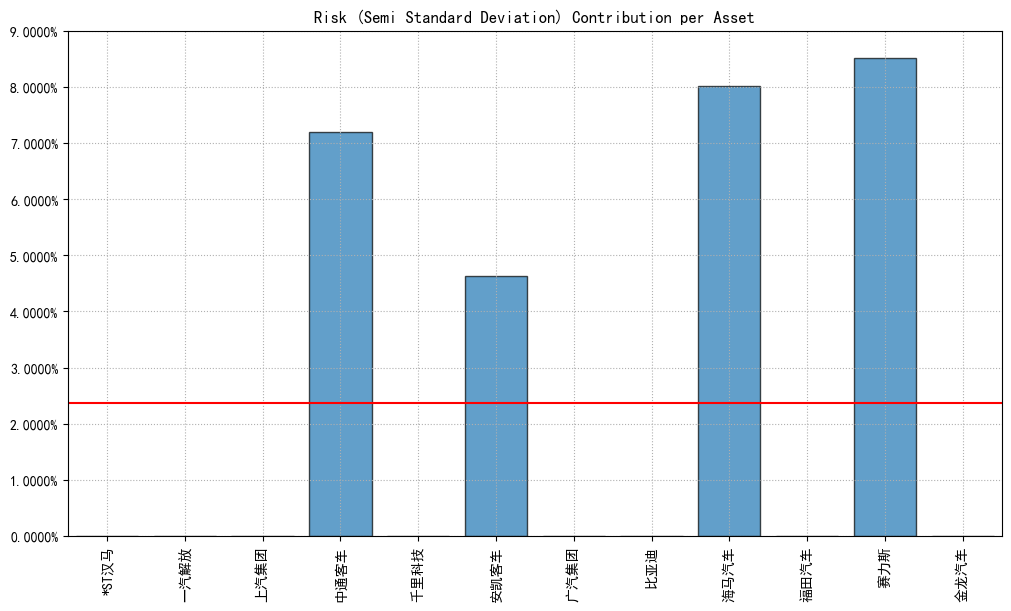

In [60]:
ax = rp.plot_risk_con(w=w1,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### rp.plot_hist

`rp.plot_hist` 是 `riskfolio` 库中的一个绘图函数，其主要功能是创建一个带有风险度量的投资组合收益直方图。

这是一张投资组合收益直方图（Portfolio Returns Histogram） ，提供了投资组合收益的分布情况及多种风险度量信息：
* 横坐标

表示投资组合的收益率，范围从 -10.00%到10.00% ，体现不同收益水平的取值区间。

* 纵坐标

是概率密度（Probability Density），反映在对应收益率水平附近，收益出现的概率密度大小，不直接等同于概率，但密度越高说明收益落在该区间可能性相对越大。

* 直方图柱体

展示了投资组合收益在不同区间的分布频率，柱体越高，说明收益落在该区间的情况越频繁 ，可看出收益分布并非完全对称。
* 曲线

图中黄色虚线是基于均值（μ = 0.20% ）和标准差（σ = 2.55% ）绘制的正态分布曲线，用于对比实际收益分布与理论正态分布的差异，实际分布与理论曲线有偏离，说明投资组合收益不完全符合正态分布特征。 
* 各类风险度量线

 - **蓝色实线**：代表均值（Mean），为0.20% ，是投资组合收益的平均水平。
 - **红色实线**：均值 - 标准差（Mean - Std. Dev. ），标准差为2.55% ，数值为 -2.35% ，体现收益在均值基础上偏离一个标准差的下限位置。
 - **粉色实线**：均值 - 平均绝对偏差（Mean - MAD ），平均绝对偏差为1.99% ，数值为 -1.79%  ，衡量收益偏离均值的平均绝对程度。
 - **深蓝色实线**：均值 - 几何平均偏差（Mean - GMD ），几何平均偏差为2.84% ，数值为 -2.65% ，从几何平均角度衡量收益偏离均值情况。 
 - **橙色实线**：95.00%置信水平风险价值（95.00% Confidence VaR ），为 -4.14%  ，表示在95%的置信水平下，投资组合可能遭受的最大损失。
 - **绿色实线**：95.00%置信水平条件风险价值（95.00% Confidence CVaR ），为 -5.16% ，是在超过VaR损失的条件下，损失的期望值。
 - **紫红色实线**：95.00%置信水平尾部基尼系数（95.00% Confidence Tail Gini ），为 -5.67% ，衡量收益分布尾部的不平等程度，反映极端损失情况。
 - **浅蓝色实线**：95.00%置信水平期望尾部损失（95.00% Confidence EVaR ），为 -6.00% ，度量在极端情况下损失的期望值。 
 - **紫色实线**：95.0%置信水平相对尾部风险价值（95.0% Confidence RLVaR(0.3) ），为 -6.60% ，从相对角度衡量尾部风险。 
 - **灰色实线**：最差实际收益率（Worst Realization ），为 -7.53% ，代表历史上该投资组合出现过的最差收益率情况。 

投资者可通过这些信息，了解投资组合收益的集中趋势、离散程度、风险水平，评估潜在损失情况，辅助投资决策和风险管控 。 


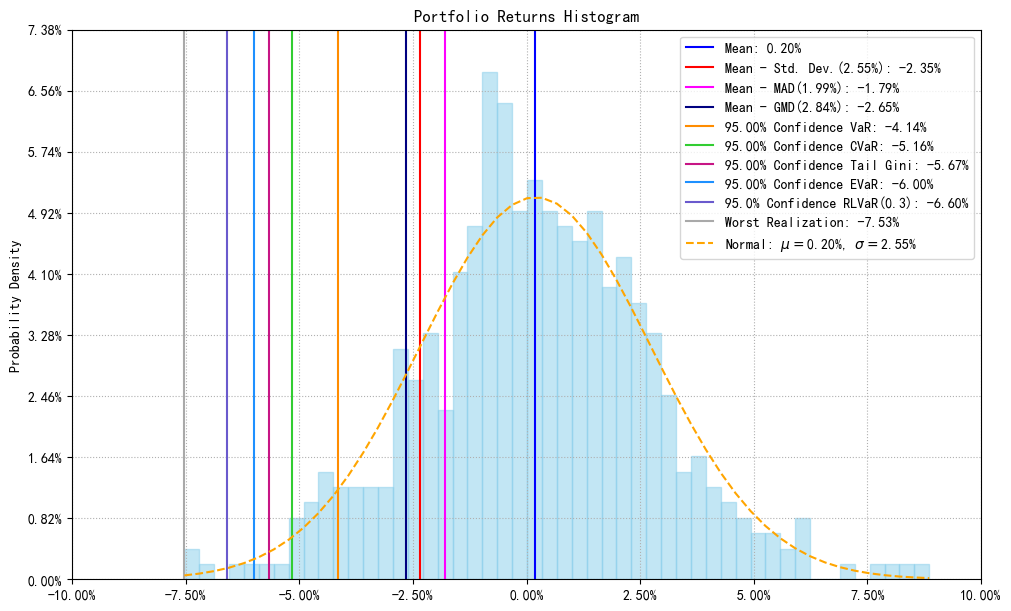

In [52]:
ax = rp.plot_hist(returns=Y,
                  w=w1,
                  alpha=0.05,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)

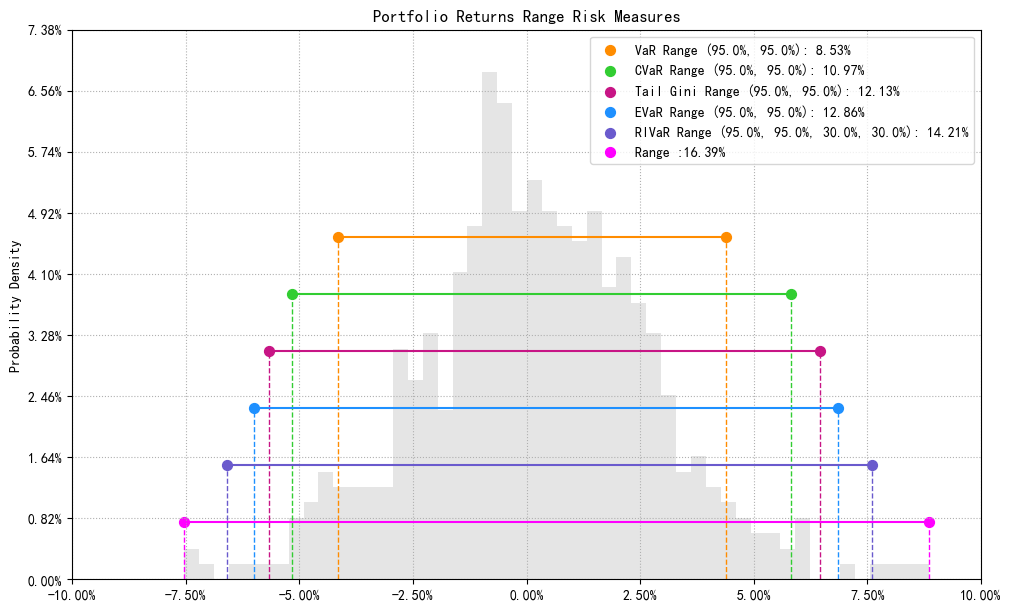

In [54]:
ax = rp.plot_range(returns=Y,
                w=w1,
                alpha=0.05,
                a_sim=100,
                beta=None,
                b_sim=None,
                bins=50,
                height=6,
                width=10,
                ax=None)

### rp.plot_drawdown

`rp.plot_drawdown` 是 `riskfolio` 库中的一个函数，用于创建一个展示投资组合价格演变和回撤情况的图表。下面为你详细介绍它的功能、参数以及实际意义。

* 功能概述

该函数会绘制出两个子图，上面的子图展示投资组合的价格演变，即随着时间推移投资组合价值的变化情况；下面的子图展示投资组合的回撤情况，回撤是指投资组合从历史最高点到当前点的下跌幅度，它反映了投资过程中可能面临的最大损失。通过这两个子图，投资者可以直观地了解投资组合在不同时间段的表现以及可能遭受的损失程度。

* 实际意义

- **评估投资组合的稳定性**：通过观察价格演变图，可以了解投资组合在不同市场环境下的表现，判断其是否具有较好的稳定性。如果价格曲线波动较大，说明投资组合的风险较高；反之，如果价格曲线较为平稳，则说明投资组合相对稳定。
- **分析回撤情况**：回撤图可以帮助投资者了解投资组合在历史上的最大损失情况，以及回撤的持续时间和恢复情况。较大的回撤意味着投资者可能会面临较大的损失，而较长的回撤持续时间则会影响投资者的资金使用效率。通过分析回撤情况，投资者可以评估投资组合的风险承受能力，并制定相应的风险管理策略。
- **优化投资组合**：根据价格演变和回撤情况，投资者可以对投资组合进行优化。例如，如果发现某个资产在回撤期间表现较差，可以考虑减少该资产的权重；或者增加一些具有抗跌性的资产，以降低投资组合的回撤风险。


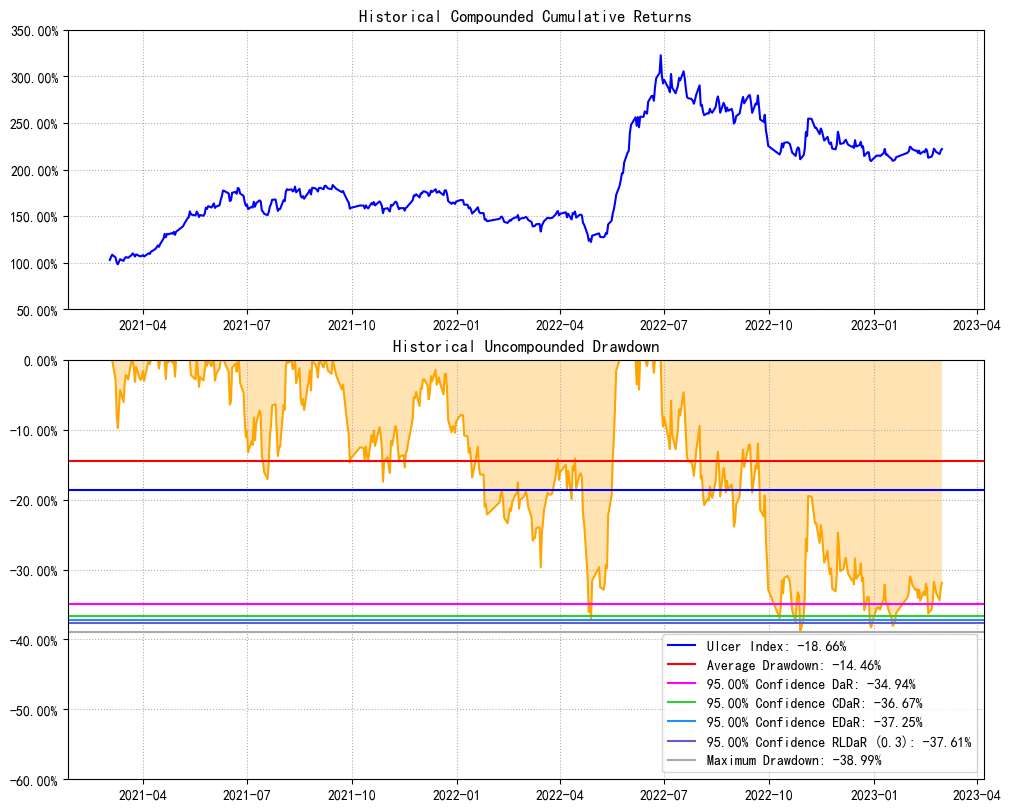

In [55]:
ax = rp.plot_drawdown(returns=Y,
                      w=w1,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

### rp.plot_table

这是一份投资组合风险与收益相关指标的汇总表格，以下是对各指标的解读：

* 盈利能力及其他输入（Profitability and Other Inputs ）

- **Mean Return (1)**：平均收益率，年化后为49.6285% ，反映投资组合平均的盈利水平。
- **Compound Annual Growth Rate (CAGR)**：复合年增长率，为31.7407% ，体现投资组合在一定时期内资产价值的年均复合增长速度。
- **Minimum Acceptable Return (MAR) (1)**：最低可接受收益率，设为0.0000% ，是投资者设定的可接受的最低回报标准。
- **Significance Level**：显著性水平，为5.0000% ，常用于统计推断中，衡量结果的可靠性 。

*  基于收益率的风险度量（Risk Measures based on Returns ）

- **Standard Deviation (2)**：标准差，年化后40.4864% ，衡量投资组合收益率的波动程度，数值越大波动越大。右侧数值（Return - MAR）/Risk是经风险调整后的收益指标，这里为1.225807 。
- **Mean Absolute Deviation (MAD) (2)**：平均绝对偏差，年化后31.5414% ，以绝对值衡量收益率偏离均值的平均程度。
- **Semi Standard Deviation (2)**：半标准差，年化后28.3717% ，只考虑收益率低于均值部分的波动，更关注下行风险。
- **First Lower Partial Moment (FLPM) (2)**：一阶下半部分矩，年化后14.2155% ，衡量收益率低于某一阈值（常为均值）的程度，反映下行风险。
- **Second Lower Partial Moment (SLPM) (2)**：二阶下半部分矩，年化后26.6660% ，对下行风险的度量更敏感，考虑了收益率偏离均值的程度平方。
- **Value at Risk (VaR) (2)**：风险价值，年化后65.7368% ，在给定置信水平下，投资组合在一定时期内可能遭受的最大损失。
- **Conditional Value at Risk (CVaR) (2)**：条件风险价值，年化后81.9412% ，衡量超过VaR损失的条件下，损失的期望值。
- **Entropic Value at Risk (EVaR) (2)**：熵风险价值，年化后90.0577% ，基于信息熵概念衡量风险。
- **Tail Gini of Losses (TG) (2)**：损失尾部基尼系数，年化后95.2020% ，衡量损失分布尾部的不平等程度，反映极端损失情况。
- **Relativistic Value at Risk (RLVaR ) (2)**：相对论风险价值，年化后104.7210% ，一种考虑特定风险调整的风险度量。
- **Worst Realization (2)**：最差收益率，年化后119.5316% ，代表历史上投资组合出现过的最差收益情况。
- **Skewness**：偏度，为0.08095 ，衡量收益率分布的不对称程度，正值表示右偏，存在较大正收益的可能性；负值表示左偏，存在较大负收益可能性。
- **Kurtosis**：峰度，为0.49098 ，衡量收益率分布的尖峰程度，反映极端值出现的概率。 



* 基于回撤的风险度量（Risk Measures based on Drawdowns (3) ）

- **Ulcer Index (UCI)**：溃疡指数，为18.6600% ，衡量投资组合价值下跌的深度和持续时间，数值越高表示投资组合“创伤”越大。
- **Average Drawdown (ADD)**：平均回撤，为14.4616% ，反映投资组合在一段时间内平均的价值下跌幅度。
- **Drawdown at Risk (DaR)**：风险回撤，为34.9384% ，在一定置信水平下，投资组合可能面临的最大回撤。
- **Conditional Drawdown at Risk (CDaR)**：条件风险回撤，为36.6735% ，衡量超过DaR回撤的条件下，回撤的期望值。
- **Entropic Drawdown at Risk (EDaR)**：熵风险回撤，为37.2511% ，基于熵概念衡量回撤风险。
- **Relativistic Drawdown at Risk (RLDaR)**：相对论风险回撤，为37.6074% ，一种特定的回撤风险度量。
- **Max Drawdown (MDD)**：最大回撤，为38.9887% ，表示投资组合从历史最高点到最低点的最大价值下跌幅度。 

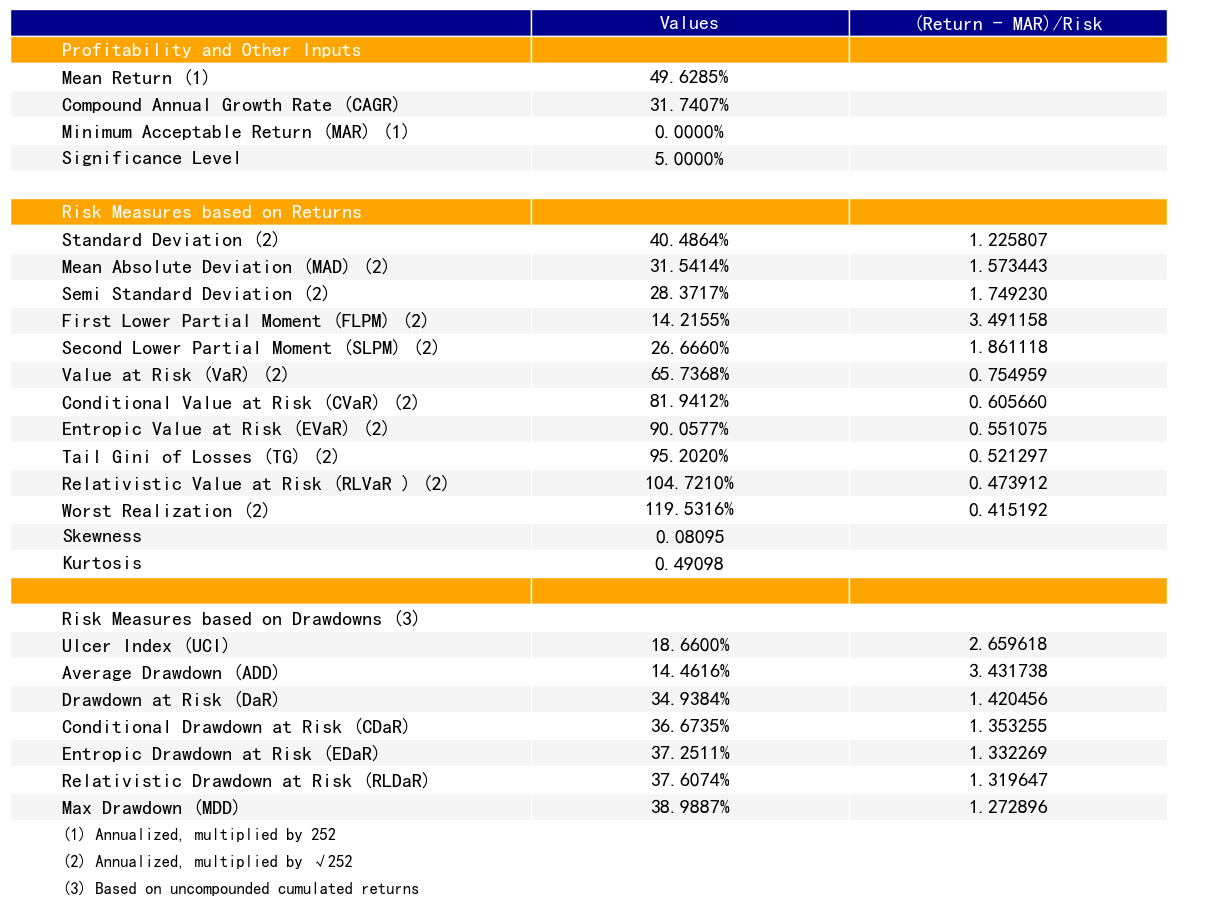

In [56]:
ax = rp.plot_table(returns=Y,
                   w=w1,
                   MAR=0,
                   alpha=0.05,
                   ax=None)

### rp.plot_clusters

`rp.plot_clusters` 是 `riskfolio` 库中的一个函数，用于基于选定的相关性度量创建聚类图。以下从功能、参数、用途和意义等方面为你详细介绍：

* 功能概述

该函数能够对资产收益率数据进行聚类分析，并将聚类结果以可视化的方式呈现出来。通过聚类图，投资者可以直观地看到资产之间的相关性和相似性，了解哪些资产倾向于聚为一类，进而辅助投资决策，如资产配置、风险分散等。

* 参数说明

- **`returns`**：这是一个 `DataFrame` 类型的资产收益率数据，是聚类分析的基础，包含了不同资产在各个时间点的收益率信息。
- **`custom_cov`**：自定义协方差矩阵，当 `codependence` 参数值为 `'custom_cov'` 时使用，默认值为 `None`。
- **`codependence`**：用于构建距离度量和聚类的相关性或相似性矩阵，有多种可选值，如 `'pearson'`（皮尔逊相关矩阵）、`'spearman'`（斯皮尔曼相关矩阵）等，默认值为 `'pearson'`。不同的相关性度量方式会影响聚类的结果。
- **`linkage`**：层次聚类的连接方法，如 `'ward'`、`'single'`、`'complete'` 等，默认值为 `'ward'`。不同的连接方法决定了聚类过程中如何合并聚类，会对最终的聚类结构产生影响。
- **`k`**：聚类数，该值将取代通过双差异间隙统计量计算出的最优聚类数，默认值为 `None`。
- **`max_k`**：双差异间隙统计量用于寻找最优聚类数时使用的最大聚类数，默认值为 10。
- **`bins_info`**：用于计算变异信息的箱数，有多种选择，如 `'KN'`（克努特选择法）、`'FD'`（弗里德曼 - 迪亚科尼斯选择法）等，默认值为 `'KN'`。
- **`alpha_tail`**：下尾相依指数的显著性水平，默认值为 0.05。
- **`gs_threshold`**：格伯统计量阈值，默认值为 0.5。
- **`leaf_order`**：布尔值，指示聚类是否按顺序排列，以使连续叶节点之间的距离最小，默认值为 `True`。
- **`show_clusters`**：布尔值，指示是否绘制聚类，默认值为 `True`。
- **`dendrogram`**：布尔值，指示绘图是否有树形图，默认值为 `True`。
- **`cmap`**：用于绘制 `pcolormesh` 图的颜色映射，默认值为 `'RdYlBu'`。
- **`linecolor`**：用于在 `pcolormesh` 图中识别聚类的颜色，默认值为 `'fuchsia'`。
- **`title`**：图表的标题，默认值为 `''`。
- **`height`**：图像的高度（英寸），默认值为 12。
- **`width`**：图像的宽度（英寸），默认值为 12。
- **`ax`**：如果提供，则在该轴上绘制，默认值为 `None`。

* 用途和意义

- **资产分类与配置**：通过聚类图，投资者可以将资产按照相似性进行分类。相关性高的资产会被聚为一类，在构建投资组合时，可以考虑在不同聚类的资产中进行配置，以实现风险分散。例如，如果某一类资产受宏观经济因素影响较大，而另一类资产受行业特定因素影响较大，将资金分散投资于这两类资产可以降低整个投资组合对单一因素的敏感性。
- **风险评估**：了解资产之间的相关性有助于评估投资组合的风险。如果投资组合中的资产大多集中在少数几个聚类中，那么该投资组合可能面临较高的系统性风险。相反，分散在多个不同聚类中的资产组合可能具有更好的抗风险能力。
- **发现投资机会**：聚类图还可以帮助投资者发现潜在的投资机会。例如，当某个聚类中的资产表现出相似的趋势，但其中个别资产的表现明显落后或领先时，投资者可以进一步分析这些资产的基本面，判断是否存在投资价值。 

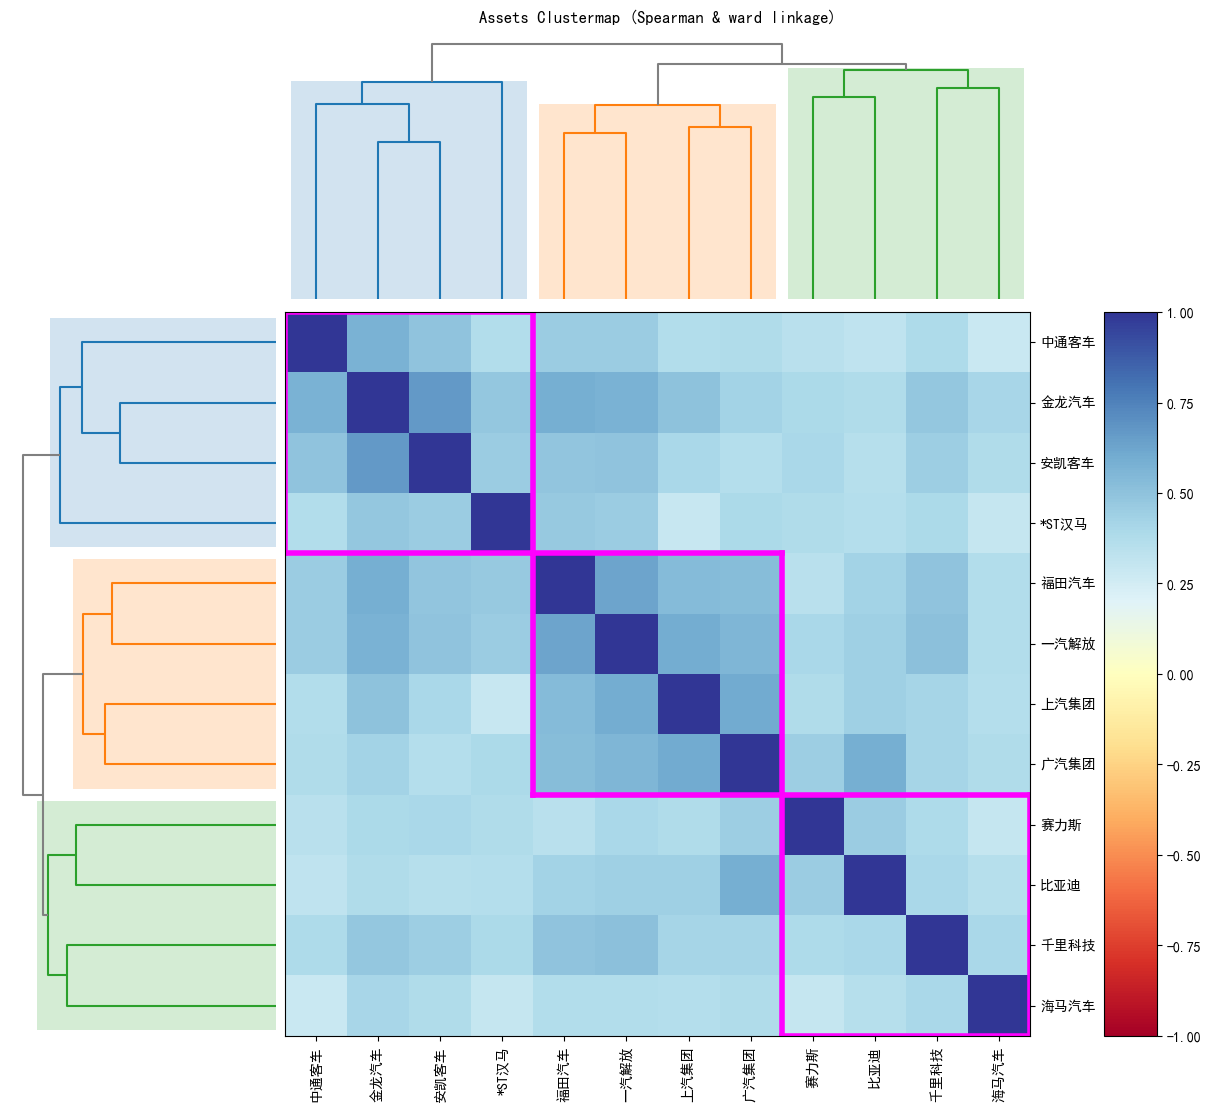

In [57]:
ax = rp.plot_clusters(returns=Y,
                      codependence='spearman',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

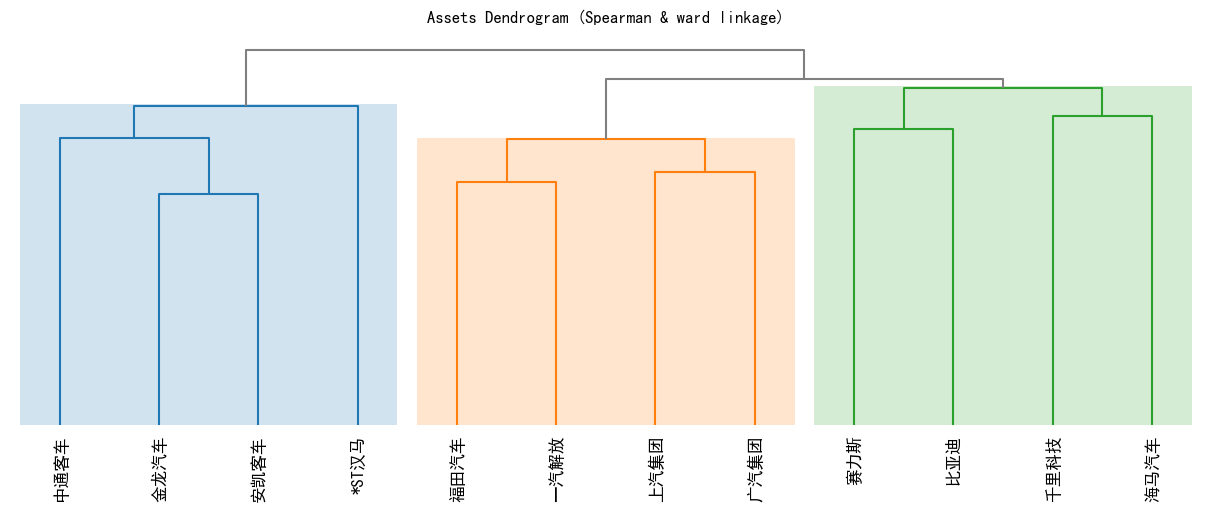

In [58]:
ax = rp.plot_dendrogram(returns=Y,
                        codependence='spearman',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

### rp.plot_network

`rp.plot_network` 是 `riskfolio` 库中的一个函数，主要用于创建投资组合中资产关系的网络绘图。以下从功能、参数、用途及意义等方面详细介绍：

* 功能概述

该函数会根据资产收益率数据和指定的相关性度量、聚类方法等，构建一个网络图形来展示资产之间的关系。对于 `DBHT` 连接方法，使用平面最大过滤图（PMFG）；对于其他连接方法，使用最小生成树（MST）。通过这个网络图形，能直观呈现资产之间的关联结构，帮助投资者理解资产间的相互关系。

* 参数说明

- **`returns`**：`DataFrame` 类型的资产收益率数据，是构建网络的基础，包含不同资产在各时间点的收益率。
- **`custom_cov`**：自定义协方差矩阵，在 `codependence` 为 `'custom_cov'` 时使用，默认值为 `None`。
- **`codependence`**：用于构建距离度量和聚类的相关性或相似性矩阵，有多种可选值，如 `'pearson'`（皮尔逊相关矩阵）、`'spearman'`（斯皮尔曼相关矩阵）等，默认值为 `'pearson'`。不同的相关性度量方式会影响网络结构。
- **`linkage`**：层次聚类的连接方法，例如 `'ward'`、`'single'`、`'complete'` 等，默认值为 `'ward'`。不同连接方法决定聚类合并方式，影响最终网络结构。
- **`k`**：聚类数，默认值为 `None`。若指定该值，会取代通过双差异间隙统计量计算出的最优聚类数。
- **`max_k`**：双差异间隙统计量用于寻找最优聚类数时使用的最大聚类数，默认值为 10。
- **`bins_info`**：用于计算变异信息的箱数，有 `'KN'`（克努特选择法）、`'FD'`（弗里德曼 - 迪亚科尼斯选择法）等多种选择，默认值为 `'KN'`。
- **`alpha_tail`**：下尾相依指数的显著性水平，默认值为 0.05。
- **`gs_threshold`**：格伯统计量阈值，默认值为 0.5。
- **`leaf_order`**：布尔值，指示聚类是否按顺序排列，以使连续叶节点之间的距离最小，默认值为 `True`。
- **`kind`**：`networkx` 布局的类型，有 `'spring'`（弹簧布局）、`'planar'`（平面布局）、`'circular'`（圆形布局）、`'kamada'`（神田 - 川井布局）等可选，默认值为 `'spring'`。不同布局会呈现不同的网络可视化效果。
- **`seed`**：`networkx` 弹簧布局的随机种子，默认值为 0。用于保证结果的可重复性。
- **`node_labels`**：布尔值，指定节点标签是否可见，默认值为 `True`。
- **`node_size`**：节点的大小，默认值为 1400。
- **`node_alpha`**：节点的透明度参数，默认值为 0.7。
- **`font_size`**：节点标签的字体大小，默认值为 10。
- **`title`**：图表的标题，默认值为 `''`。
- **`height`**：图像的高度（英寸），默认值为 8。
- **`width`**：图像的宽度（英寸），默认值为 10。
- **`ax`**：如果提供，则在该轴上绘制，默认值为 `None`。

* 用途和意义

- **资产关系可视化**：以直观的网络图形展示资产间的关联，投资者能快速识别出哪些资产紧密相连，哪些资产相对独立。例如，若两只股票在网络中直接相连且连线较粗，可能表示它们之间的相关性较高，价格走势可能较为相似。
- **风险分散分析**：有助于评估投资组合的风险分散程度。如果网络中大部分资产集中在少数几个中心节点附近，说明投资组合可能存在较高的系统性风险；若资产分布较为分散，相互之间的连接较为稀疏，则投资组合的风险分散效果可能较好。
- **投资策略制定**：根据网络结构，投资者可以制定更合理的投资策略。例如，对于那些与其他资产关联性较弱的资产，可以考虑适当增加其在投资组合中的权重，以降低组合整体的风险；对于关联性强的资产，可以进行更细致的分析，判断是否存在过度集中投资的问题。 

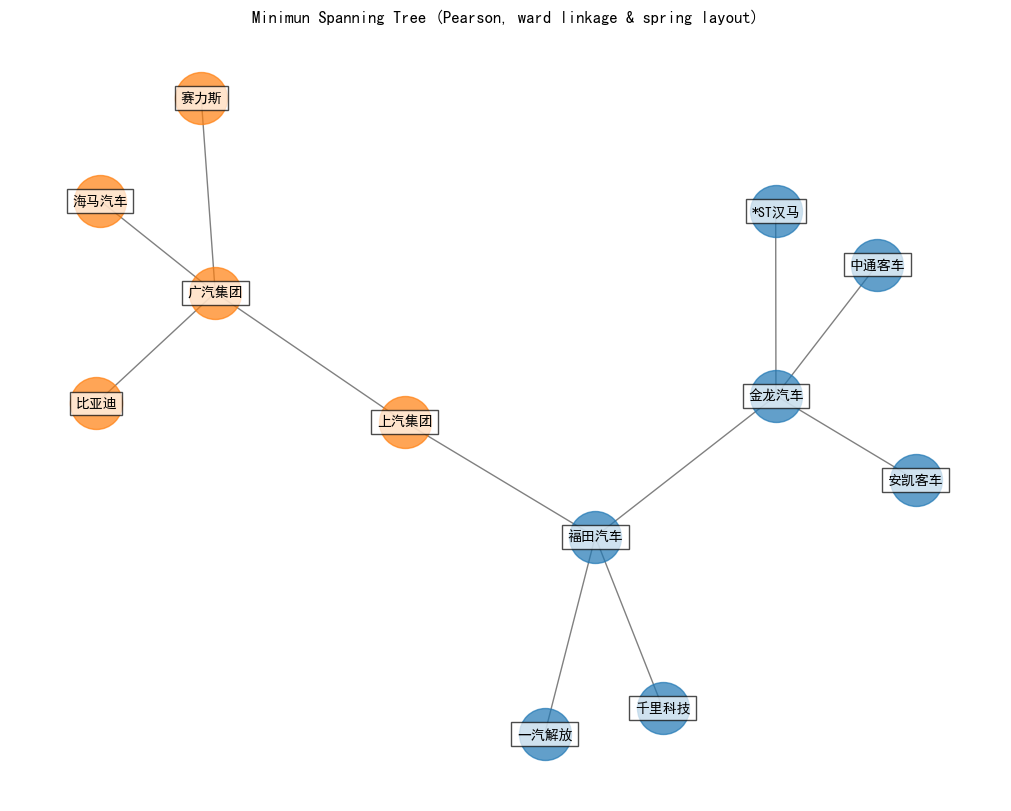

In [59]:
ax = rp.plot_network(returns=Y,
                     codependence="pearson",
                     linkage="ward",
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='spring',
                     ax=None)